**Lesson 9b**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Real neural networks inspired artificial neural networks (ANNs). Though planes were inspired by birds, they don’t have to flap their wings. Similarly, ANNs have gradually become quite different from their biological cousins. <br>

ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go by examining millions of past games and then playing against itself (DeepMind’s AlphaGo).  <br> 

In this lesson, we will introduce artificial neural networks, starting with a quick tour of the very first ANN architectures. Then we will present Multi-Layer Perceptrons (MLPs) and implement one using TensorFlow to tackle the MNIST digit classification problem.



Surprisingly, ANNs have been around for quite a while: they were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts. <br>

From 1960s-1980s - dark age period with little development. In 1990s SVM proposed as better alternative to ANN. From 2010 resurgent of ANN because:
* Huge quantity  of data. ANN outperform other ML algorithms on large and complex problems
* Increase of computation power and thanks to gaming industry powerful GPU that can process ANN very efficiently
* Small tweaks of training algorithms that had strong impact
* Theoretical limitations of ANN (local optima problem) are rare in practice
* Now best brains work on ANN

Warren McCulloch and Walter Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active. For example, let’s build a few ANNs that perform various logical computations, assuming that a neuron is activated when at least two of its inputs are active.

![]("C:\Users\ilyar\Desktop\ML_JHU\images\Lecture10\ann1.png)

<p>
    <img src="images/Lecture10/ann1.png" width="800" height="400" />
</p>

Neurons:
    1. Identity function: if neuron A is activated, then neuron C gets activated as well. 
    2. Neuron C is activated only when **both** neurons A and B are activated
    3. Neuron C gets activated if either neuron A **or** neuron B is activated (or both)
    4. Neuron C is activated only if neuron A is **active** and if neuron B is **off**.

# Perceptrons

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on artificial neuron  called a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input connection is associated with a weight. <br>

The LTU computes a weighted sum of its inputs ($z = w_1 x_1 + w_2 x_2 + ... + w_n x_n = w^T \cdot x$), then applies a step function to that sum and outputs the result: 
$$h_{w}(x) = step(z) = step(w^T \cdot x)$$
<p>
    <img src="images/Lecture10/ann2.png" width="400" height="400" />
</p>


The most common step function used in Perceptrons is the Heaviside step function (discrete function). Sometimes the sign function is used instead:
$$heavyslide(z) = \begin{cases}
0\quad &if\quad z < 0 \\
1\quad &if\quad z \geq 0 
\end{cases}$$

$$sgn(z) = \begin{cases}
-1 \quad &if\quad z < 0 \\
0\quad &if\quad z = 0 \\
1\quad &if\quad z \geq 0 
\end{cases}$$



A single LTU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM). <br>

Next we use a single LTU to classify iris flowers based on the petal length and width (also adding an extra bias feature $x_0 = 1$, just like we did in previous chapters). Training an LTU means finding the right values for $w_0$, $w_1$, and $w_2$. <br>

A Perceptron has a single layer of LTUs, with each neuron connected to all the inputs. These connections are often represented using special pass-through neurons called input neurons: they just output whatever input they are fed. Moreover, an extra bias feature is generally added (x0 = 1). This bias feature is typically represented using a special type of neuron called a bias neuron, which just outputs 1 all the time. <br>

A Perceptron with two inputs and three outputs is represented in next. It can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier. <br>

<p>
    <img src="images/Lecture10/ann3.png" width="600" height="400" />
</p>


# Training:

Perceptrons are trained by taking into account the error made by the network; it does not reinforce connections that lead to the wrong output. <br>
Perceptron is fed one training instance at a time, and for each instance it makes its predictions.<br>

For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 
$$w_{i,j}^{next} = w_{i,j} = \eta(\hat{y}_j - y_j)x_i$$ 
Weights are changes with every instance. 

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns. However, if the training instances are linearly separable, the algorithm would converge to a solution. <br>

Scikit-Learn provides a Perceptron class that implements a single LTU network

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

Single Perceptron can only maange one straigt line, though it is sufficient in this case.

Saving figure perceptron_iris_plot


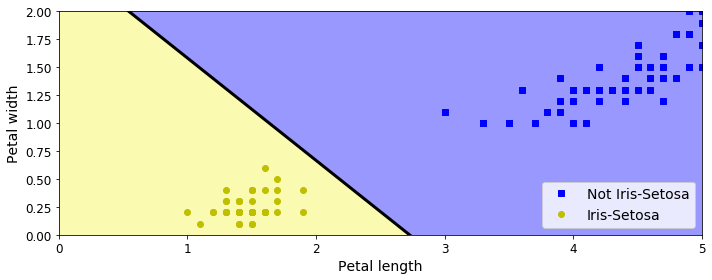

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

Perceptron learning algorithm strongly resembles Stochastic Gradient Descent, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Perceptrons has number of serious weaknesses of Perceptrons, in particular the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem: An XOr function should return a true value if the two inputs are not equal and a false value if they are equal. <br>


Some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron (MLP). In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented next, for each combination of inputs: with inputs $(0, 0)$ or $(1, 1)$ the network outputs 0, and with inputs $(0, 1)$ or $(1, 0)$ it outputs 1. <br>

<p>
    <img src="images/Lecture10/ann4.png" width="600" height="400" />
</p>

* left-bottom: sends negative number in all cases except $x_1 = x_2 = 1$
* right-bottom: sends positive number in all cases except $x_1 = x_2 = 0$
* if left-bottom is negative or right-bottom is positive -- send output to 1

#Multi-Layer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of LTUs, called hidden layers, and one final layer of LTUs called the output layer. Every layer except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers, it is called a deep neural network (DNN). <br>
<p>
    <img src="images/Lecture10/ann5.png" width="600" height="400" />
</p>

The MLP is solved using backpropagation training algorithm that uses Gradient Descent using reverse-mode autodiff. <br>

1. For each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer (this is the forward pass, just like when making predictions).
2. Then it measures the network’s output error (i.e., the difference between the desired output and the actual output of the network), and it computes how much each neuron in the last hidden layer contributed to each output neuron’s error. <br>
3. It then proceeds to measure how much of these error contributions came from each neuron in the previous hidden layer and so on until the algorithm reaches the input layer. 
4. This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward in the network (hence the name of the algorithm).
5. Forward and reverse passes of backpropagation simply perform reverse-mode autodiff. For each node we measure the gradient  of $y$ $\frac{\partial y}{\partial n_i}$ and the gradient of MSE $y$ $\frac{\partial MSE}{\partial n_i}$.
6.The last step of the backpropagation algorithm is a Gradient Descent step on all the connection weights in the network, using the error gradients measured earlier.

The key change to the MLP’s architecture is the replacement of the step function with the logistic function, $\sigma(z)=1/(1+\exp(-z))$. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. <br>

The backpropagation algorithm may be used with other activation functions, instead of the logistic function. Two other popular activation functions are:

* The hyperbolic tangent function $\tanh(z) = 2\sigma(2z) - 1$. Just like the logistic function it is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function), which tends to make each layer’s output centered around 0 at the beginning of training. This often helps speed up convergence.
* The ReLU function: $ReLU(z) = \max(0, z)$. It is continuous but not differentiable at z = 0. However, in practice it works very well and is very fast to compute. Most importantly, the fact that it does not have a maximum output value also helps reduce some issues during Gradient Descent, which we will discuss in the next lesson.

# Activation functions

In [4]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


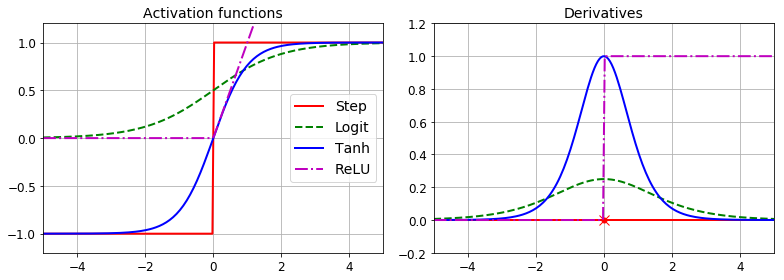

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

An MLP is often used for classification, with each output corresponding to a different binary class (e.g., spam/ham, urgent/not-urgent, and so on). When the classes are exclusive (e.g., classes 0 through 9 for digit image classification), the output layer is typically modified by replacing the individual activation functions by a shared soft‐max (multinomial logit) function (see figure). The output of each neuron corresponds to the estimated probability of the corresponding class. <br>

The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN). Later we will study recurrent networks where the information flows in both directions. 
<p>
    <img src="images/Lecture10/ann6.png" width="600" height="400" />
</p>

In [6]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

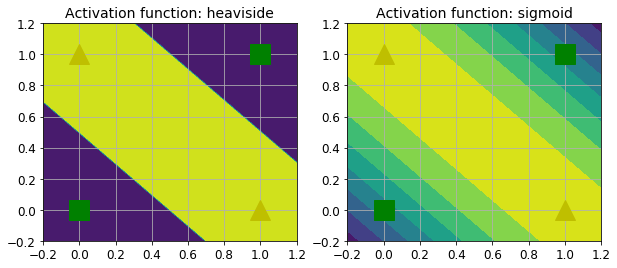

In [7]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

The simplest way to train an MLP with TensorFlow is to use the high-level API TF.Learn, which is quite similar to Scikit-Learn’s API. The DNNClassifier class makes it trivial to train a deep neural network with any number of hidden layers, and a softmax output layer to output estimated class probabilities. <br>

Next we train DNN for classification with two hidden layers (one with 300 neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons:

In [2]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

1. Break data into training and testing. 
2. Scale the data to (0,1)
3. Extract 5000 observations

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

1. Specify features
2. Set DNN classifier with two layers (300 and 100 nodes), 10 output classes (digits)
3. Train data using batches of 50 observations and 40 epochs (number of time we run data through algorithm)

In [10]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_evaluation_master': '', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_is_chief': True, '_master': '', '_keep_checkpoint_max': 5, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028372748DD8>, '_save_checkpoints_secs': 600, '_num_worker_replicas': 1, '_task_type': 'worker', '_device_fn': None, '_num_ps_replicas': 0, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_session_config': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\ilyar\\AppData\\Local\\Temp\\tmpilrph7s0'}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 int

INFO:tensorflow:global_step/sec: 339.887
INFO:tensorflow:loss = 1.7447996, step = 7201 (0.294 sec)
INFO:tensorflow:global_step/sec: 363.29
INFO:tensorflow:loss = 0.49805403, step = 7301 (0.274 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.2501976, step = 7401 (0.273 sec)
INFO:tensorflow:global_step/sec: 378.365
INFO:tensorflow:loss = 0.8977372, step = 7501 (0.264 sec)
INFO:tensorflow:global_step/sec: 343.383
INFO:tensorflow:loss = 0.4928054, step = 7601 (0.291 sec)
INFO:tensorflow:global_step/sec: 292.324
INFO:tensorflow:loss = 0.18207529, step = 7701 (0.342 sec)
INFO:tensorflow:global_step/sec: 235.63
INFO:tensorflow:loss = 0.84753776, step = 7801 (0.426 sec)
INFO:tensorflow:global_step/sec: 306.643
INFO:tensorflow:loss = 0.6813962, step = 7901 (0.324 sec)
INFO:tensorflow:global_step/sec: 354.3
INFO:tensorflow:loss = 0.9685349, step = 8001 (0.281 sec)
INFO:tensorflow:global_step/sec: 324.491
INFO:tensorflow:loss = 2.2534075, step = 8101 (0.308 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 327.673
INFO:tensorflow:loss = 0.028804107, step = 15401 (0.305 sec)
INFO:tensorflow:global_step/sec: 317.3
INFO:tensorflow:loss = 0.21897495, step = 15501 (0.315 sec)
INFO:tensorflow:global_step/sec: 325.542
INFO:tensorflow:loss = 0.46189016, step = 15601 (0.307 sec)
INFO:tensorflow:global_step/sec: 307.569
INFO:tensorflow:loss = 0.47507894, step = 15701 (0.324 sec)
INFO:tensorflow:global_step/sec: 329.827
INFO:tensorflow:loss = 0.31513298, step = 15801 (0.304 sec)
INFO:tensorflow:global_step/sec: 330.917
INFO:tensorflow:loss = 0.044898372, step = 15901 (0.302 sec)
INFO:tensorflow:global_step/sec: 339.89
INFO:tensorflow:loss = 0.015813412, step = 16001 (0.294 sec)
INFO:tensorflow:global_step/sec: 332.01
INFO:tensorflow:loss = 0.44662732, step = 16101 (0.301 sec)
INFO:tensorflow:global_step/sec: 337.6
INFO:tensorflow:loss = 0.052802585, step = 16201 (0.296 sec)
INFO:tensorflow:global_step/sec: 334.223
INFO:tensorflow:loss = 0.03357581, step = 16301 (0.2

INFO:tensorflow:global_step/sec: 417.78
INFO:tensorflow:loss = 0.023155447, step = 23501 (0.239 sec)
INFO:tensorflow:global_step/sec: 391.668
INFO:tensorflow:loss = 0.044898845, step = 23601 (0.254 sec)
INFO:tensorflow:global_step/sec: 316.302
INFO:tensorflow:loss = 0.051835943, step = 23701 (0.317 sec)
INFO:tensorflow:global_step/sec: 316.3
INFO:tensorflow:loss = 0.02680178, step = 23801 (0.315 sec)
INFO:tensorflow:global_step/sec: 287.297
INFO:tensorflow:loss = 0.011425098, step = 23901 (0.348 sec)
INFO:tensorflow:global_step/sec: 268.092
INFO:tensorflow:loss = 0.037953876, step = 24001 (0.375 sec)
INFO:tensorflow:global_step/sec: 355.563
INFO:tensorflow:loss = 0.04354292, step = 24101 (0.279 sec)
INFO:tensorflow:global_step/sec: 365.938
INFO:tensorflow:loss = 0.012279621, step = 24201 (0.274 sec)
INFO:tensorflow:global_step/sec: 371.362
INFO:tensorflow:loss = 0.037756186, step = 24301 (0.268 sec)
INFO:tensorflow:global_step/sec: 299.305
INFO:tensorflow:loss = 0.10932177, step = 2440

INFO:tensorflow:global_step/sec: 317.3
INFO:tensorflow:loss = 0.009040911, step = 31601 (0.314 sec)
INFO:tensorflow:global_step/sec: 344.56
INFO:tensorflow:loss = 0.034830038, step = 31701 (0.291 sec)
INFO:tensorflow:global_step/sec: 303.842
INFO:tensorflow:loss = 0.027979763, step = 31801 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.389
INFO:tensorflow:loss = 0.041561667, step = 31901 (0.321 sec)
INFO:tensorflow:global_step/sec: 387.133
INFO:tensorflow:loss = 0.022052608, step = 32001 (0.258 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.030578215, step = 32101 (0.243 sec)
INFO:tensorflow:global_step/sec: 356.821
INFO:tensorflow:loss = 0.03624834, step = 32201 (0.280 sec)
INFO:tensorflow:global_step/sec: 368.632
INFO:tensorflow:loss = 0.024639087, step = 32301 (0.271 sec)
INFO:tensorflow:global_step/sec: 384.166
INFO:tensorflow:loss = 0.026228962, step = 32401 (0.260 sec)
INFO:tensorflow:global_step/sec: 396.313
INFO:tensorflow:loss = 0.008638771, step = 32

INFO:tensorflow:global_step/sec: 399.471
INFO:tensorflow:loss = 0.006464257, step = 39701 (0.250 sec)
INFO:tensorflow:global_step/sec: 401.069
INFO:tensorflow:loss = 0.015484757, step = 39801 (0.250 sec)
INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 0.021739487, step = 39901 (0.320 sec)
INFO:tensorflow:global_step/sec: 399.47
INFO:tensorflow:loss = 0.057504572, step = 40001 (0.249 sec)
INFO:tensorflow:global_step/sec: 407.592
INFO:tensorflow:loss = 0.009671077, step = 40101 (0.246 sec)
INFO:tensorflow:global_step/sec: 405.939
INFO:tensorflow:loss = 0.004011615, step = 40201 (0.246 sec)
INFO:tensorflow:global_step/sec: 405.941
INFO:tensorflow:loss = 0.014125947, step = 40301 (0.246 sec)
INFO:tensorflow:global_step/sec: 410.93
INFO:tensorflow:loss = 0.055029336, step = 40401 (0.243 sec)
INFO:tensorflow:global_step/sec: 402.682
INFO:tensorflow:loss = 0.020526843, step = 40501 (0.247 sec)
INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 0.029472917, step = 4

Calculate accuracy using testing data. Under the hood, the DNNClassifier class creates all the neuron layers, based on the ReLU activation function (we can change this by setting the *activation_fn* hyper‐parameter). The output layer relies on the softmax function, and the cost function is cross entropy.

In [11]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-14-20:30:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ilyar\AppData\Local\Temp\tmpilrph7s0\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-14-20:30:17
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9795, average_loss = 0.102027334, global_step = 44000, loss = 12.914853
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ilyar\AppData\Local\Temp\tmpilrph7s0\model.ckpt-44000


In [12]:
eval_results

{'accuracy': 0.9795,
 'average_loss': 0.102027334,
 'global_step': 44000,
 'loss': 12.914853}

In [13]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ilyar\AppData\Local\Temp\tmpilrph7s0\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -7.329111  ,  -0.8621856 ,  -0.71679497,   8.969017  ,
         -2.5210323 ,  -8.930429  , -19.881777  ,  25.501575  ,
         -1.6607108 ,   1.7658306 ], dtype=float32),
 'probabilities': array([5.5183989e-15, 3.5511060e-12, 4.1068264e-12, 6.6069504e-08,
        6.7598341e-13, 1.1126777e-15, 1.9510108e-20, 9.9999988e-01,
        1.5979702e-12, 4.9169648e-11], dtype=float32)}

## Using plain TensorFlow

Next we will reconstruct the neural network using lower-level Python code. First we will constuct a TensorFlowGraph and then we will run the graph to train the model.

We specify the number of inputs, number of neurons in each layers, and the number of outputs.

In [14]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

1. We construct placeholder nodes to represent the training data and targets. The shape of X is defined only as a 2D tensor.
2. The number of features is going to be 28 x 28 (one feature per pixel), but we are uncertain about the number of instances. 
3. y will be a 1D tensor with one entry per instance

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

* The placeholder X is an input layer, it will be populated by training batch. All instances in a batch will be processed simultaneously. 
* Two hidden layers are almost identical with the only difference being the number of neurons.
* The output layers uses softmax (multi-nomial logit) instead of ReLU to predict class. 

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        # Number of features
        n_inputs = int(X.get_shape()[1])
        # Set up standard deviation of the initial weights
        stddev = 2 / np.sqrt(n_inputs)
        # Initialize initial weights using truncated normal
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        # Set weights (coefficients) variable for a layer
        W = tf.Variable(init, name="kernel")
        # Set bias variable
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        # Calculate expectation Z = X*W + b
        Z = tf.matmul(X, W) + b
        # Return eighter Z or an activation function (e.g., ReLU) of Z.
        if activation is not None:
            return activation(Z)
        else:
            return Z

Weights are initiated from truncated $N(0,2/\sqrt{n_{inputs}}$ distribution as it is found to be the most efficient. 

Now we add neuron layers to form a network. The input in the subsequent layer is the output of the previous layer.

TensorFlow comes with many handy functions to create standard neural network layers.For example, *fully_connected()* function creates a fully connected layer, where all the inputs are connected to all the neurons in the layer. It creates the weights and biases variables, with the proper initialization strategy, and it uses the ReLU activation function by default.

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Next we define the cross entropy cost function to train the network. Cross entropy will penalize models that estimate a low probability for the target class. TensorFlow provides several functions to compute cross entropy. We will use sparse_soft max_cross_entropy_with_logits(): it computes the cross entropy based on the “logits” -- probabilities of each class. We TensorFlow’s reduce_mean() to complete enthropy calculation. 

The *sparse_softmax_cross_entropy_with_logits()* function is equivalent to applying the softmax activation function and then computing the cross entropy, but it's more efficient for very low probabilities. The function *softmax_cross_entropy_with_logits()* is designed for binary (one hot) data.

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

Next we define a *GradientDescentOptimizer* that will tweak the model parameters to minimize the cost function.

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Lastly, we specify how to evaluate the model using accuracy. For each instance,whether the highest predicts probability (logit) corresponds to the correct target class. *in_top_k()* returns a vector of 0/1 values, which we later use to compute average accuracy. 

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Before running, we need to initialize all variables and save out model.

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Execution Phase
We define the number of epochs and the number of batches. 

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
# Split data into batches.
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

* init node that initializes all the variables.
* Then it runs the main training loop: at each epoch, the code iterates through a number of mini-batches that corresponds to the training set size. 
* Each mini-batch is fetched via the *next_batch()* method, and then the code simply runs the training operation, feeding it the current mini-batch input data and targets.
* Next, at the end of each epoch, the code evaluates the model on the last mini-batch and on the full training set, and it prints out the result. 
* Finally, the model parameters are saved to disk.

In [24]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

SyntaxError: invalid syntax (<ipython-input-24-f3bbc3626bde>, line 12)

Let's make predictions:
1. Load parameters from the disk
2. X_new_scaled is the data we want to predict, make sure it is scaled.
3. Logit are the probabilities
4. Argmax function gives predicted class.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [ ]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

In [ ]:
from tensorflow_graph_in_jupyter import show_graph

In [ ]:
show_graph(tf.get_default_graph())

# Fine-Tuning Neural Networks:

1. There are lot hyperparemeters to estimate. Use randomized grid search to narrow-down the parameters space.
2. Complex relationships are better approximated by a lot of layers. If the network has many layers it may not need many nodes.
3. Try to add new layers if it imroves the fit.
4. Recycle lower layers from the similar models
5. Build your network as a funnel between features and outputs. Lower levels tend to have more neurons than upper one.
6. ReLU is good default activation function for classification. Regression problems don't need an activation function.


## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [ ]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [ ]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [ ]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [ ]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [ ]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [ ]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [ ]:
m, n = X_train.shape

In [ ]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

In [ ]:
os.remove(checkpoint_epoch_path)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

In [ ]:
accuracy_val